In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df1 = pd.read_csv("Files\\Cleaned dataset\\EV Car Power Consumption for Mumbai.csv")
df2 = pd.read_csv("Files\\Cleaned dataset\\EV_Station_Location.csv")
df3 = pd.read_csv("Files\\Cleaned dataset\\cleaned_combined_dataset.csv")

# Set style for plots
plt.style.use("ggplot")

In [16]:
# Print basic info
print("Dataset 1 (Power Consumption):", df1.shape)
print("Columns:", df1.columns.tolist())

print("\nDataset 2 (Station Locations):", df2.shape)
print("Columns:", df2.columns.tolist())

print("\nDataset 3 (Combined Data):", df3.shape)
print("Columns:", df3.columns.tolist())

# Display first few rows
print("\nSample from Dataset 1:\n", df1.head())
print("\nSample from Dataset 2:\n", df2.head())
print("\nSample from Dataset 3:\n", df3.head())


Dataset 1 (Power Consumption): (262, 25)
Columns: ['User ID', 'Vehicle Model', 'Battery Capacity (kWh)', 'Charging Station ID', 'Charging Station Location', 'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)', 'Charging Duration (hours)', 'Charging Rate (kW)', 'Charging Cost (USD)', 'Time of Day', 'Day of Week', 'State of Charge (Start %)', 'State of Charge (End %)', 'Distance Driven (since last charge) (km)', 'Temperature (°C)', 'Vehicle Age (years)', 'Charger Type', 'User Type', 'is_consumption_outlier', 'hour', 'dayofweek', 'month', 'is_weekend']

Dataset 2 (Station Locations): (218, 10)
Columns: ['station_name', 'address', 'operator', 'charging_types', 'payment_options', 'amenities', 'latitude', 'longitude', 'city', 'state']

Dataset 3 (Combined Data): (262, 17)
Columns: ['vehicle_model', 'battery_capacity_kwh', 'charging_station_id', 'charging_station_location', 'energy_consumed_kwh', 'charging_duration_hours', 'charging_rate_kw', 'time_of_day', 'day_of_week', 'sta

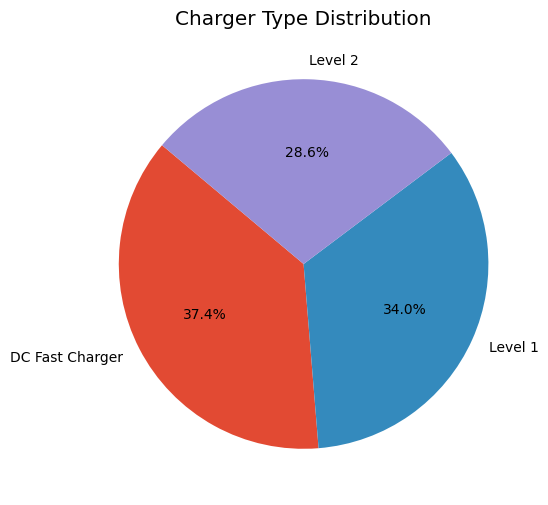

In [17]:
if "Charger Type" in df2.columns:
    charger_counts = df2["Charger Type"].value_counts()
elif "charger_type" in df3.columns:
    charger_counts = df3["charger_type"].value_counts()
else:
    charger_counts = pd.Series(dtype=int)

if not charger_counts.empty:
    plt.figure(figsize=(6,6))
    plt.pie(charger_counts, labels=charger_counts.index, autopct="%1.1f%%", startangle=140)
    plt.title("Charger Type Distribution")
    plt.show()


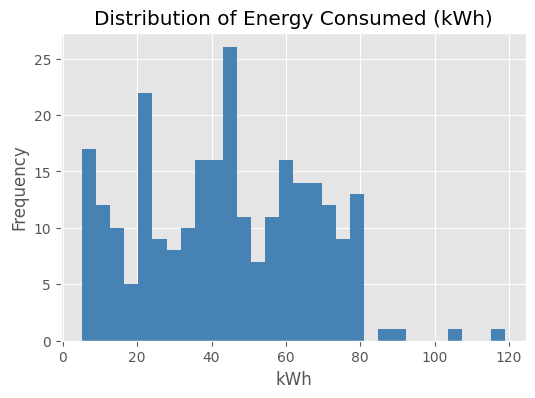

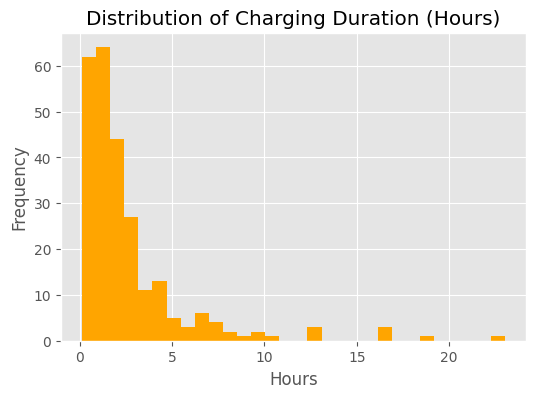

In [18]:
# Energy Consumed
if "energy_consumed_kwh" in df3.columns:
    plt.figure(figsize=(6,4))
    df3["energy_consumed_kwh"].dropna().hist(bins=30, color="steelblue")
    plt.title("Distribution of Energy Consumed (kWh)")
    plt.xlabel("kWh")
    plt.ylabel("Frequency")
    plt.show()

# Charging Duration
if "charging_duration_hours" in df3.columns:
    plt.figure(figsize=(6,4))
    df3["charging_duration_hours"].dropna().hist(bins=30, color="orange")
    plt.title("Distribution of Charging Duration (Hours)")
    plt.xlabel("Hours")
    plt.ylabel("Frequency")
    plt.show()


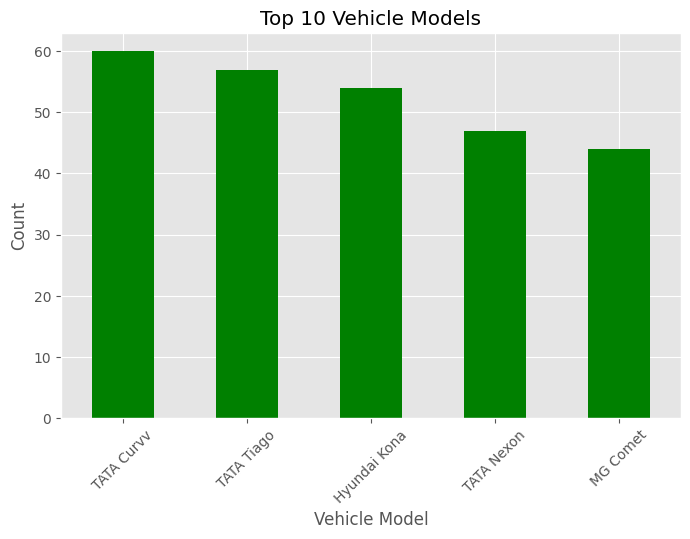

In [19]:
if "vehicle_model" in df3.columns:
    top_models = df3["vehicle_model"].value_counts().head(10)
    plt.figure(figsize=(8,5))
    top_models.plot(kind="bar", color="green")
    plt.title("Top 10 Vehicle Models")
    plt.xlabel("Vehicle Model")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


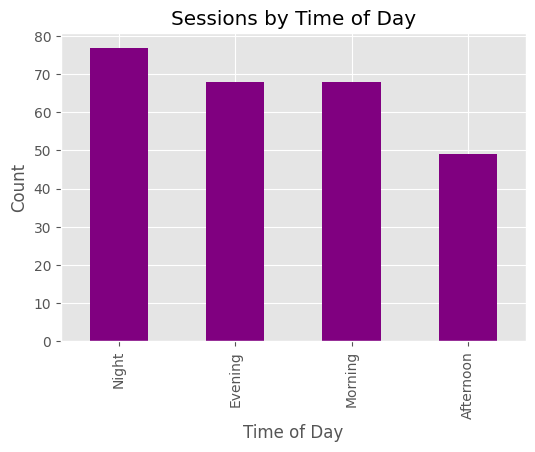

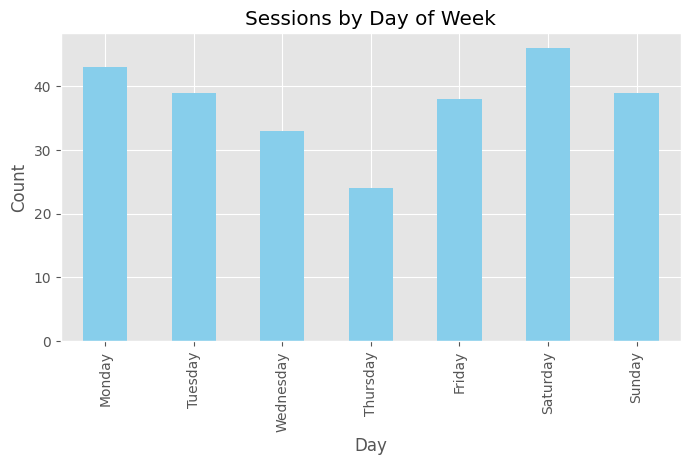

In [20]:
# Time of Day
if "time_of_day" in df3.columns:
    plt.figure(figsize=(6,4))
    df3["time_of_day"].value_counts().plot(kind="bar", color="purple")
    plt.title("Sessions by Time of Day")
    plt.xlabel("Time of Day")
    plt.ylabel("Count")
    plt.show()

# Day of Week
if "day_of_week" in df3.columns:
    order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    df3["day_of_week"] = pd.Categorical(df3["day_of_week"], categories=order, ordered=True)
    plt.figure(figsize=(8,4))
    df3["day_of_week"].value_counts().reindex(order).plot(kind="bar", color="skyblue")
    plt.title("Sessions by Day of Week")
    plt.xlabel("Day")
    plt.ylabel("Count")
    plt.show()


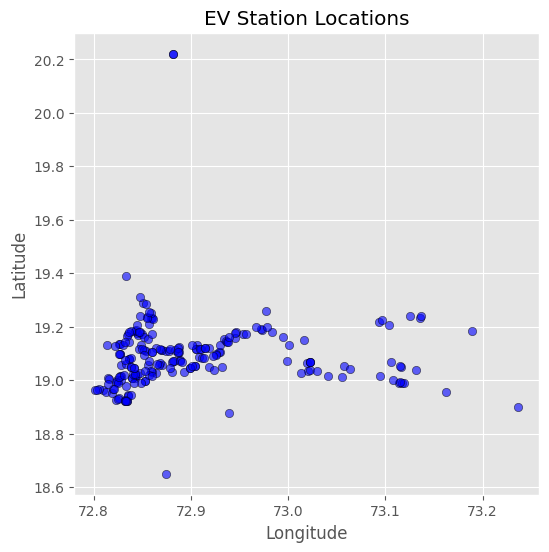

In [21]:
if "latitude" in df2.columns and "longitude" in df2.columns:
    plt.figure(figsize=(6,6))
    plt.scatter(df2["longitude"], df2["latitude"], alpha=0.6, c="blue", edgecolor="k")
    plt.title("EV Station Locations")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
